<a href="https://colab.research.google.com/github/swift-001/chirp/blob/main/FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa # for audio analysis
import librosa.display
import soundfile as sf # for reading and writing sound files
import matplotlib.pyplot as plt
import IPython.display as ipd # to display interactive rich media like audios
import numpy as np

In [ ]:
audio1 = "/content/2_jackson_46.wav"
audio2 = "/content/9_yweweler_4.wav"

In [ ]:
y1, sr1 = librosa.load(audio1) # y1 = np array of audio signals; sr = sample rate (no. of data points (samples) played back each second -- Hz)
y2, sr2 = librosa.load(audio2)

In [ ]:
# Play audio files
print("Audio 2:")
ipd.Audio(y2, rate=sr2)

Audio 2:


In [ ]:
print("Audio 1:")
ipd.Audio(y1, rate=sr1)

Audio 1:


In [ ]:
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
print(mfcc1)

[[-3.72231110e+02 -3.80088806e+02 -3.96922729e+02 -3.92274780e+02
  -3.70073151e+02 -3.19116119e+02 -2.93315735e+02 -2.91150513e+02
  -2.93273254e+02 -2.87469208e+02 -2.82854309e+02 -2.79500397e+02
  -2.92595612e+02 -3.14269135e+02 -3.30488586e+02 -3.48816498e+02
  -3.67692749e+02 -3.80922882e+02 -3.97976959e+02 -4.21677612e+02
  -4.35451996e+02 -4.44447021e+02 -4.54371094e+02]
 [ 5.82434654e+01  8.18123779e+01  8.72310715e+01  1.08264191e+02
   1.41456635e+02  1.71898026e+02  1.78558578e+02  1.75531693e+02
   1.76467972e+02  1.85178711e+02  1.92243378e+02  2.03891632e+02
   2.08920364e+02  2.05442444e+02  2.02178528e+02  1.95650787e+02
   1.92371216e+02  1.88521530e+02  1.81135696e+02  1.66066635e+02
   1.53821381e+02  1.46332367e+02  1.37617188e+02]
 [-6.76310883e+01 -8.34949417e+01 -9.34203186e+01 -6.43867035e+01
  -3.56554718e+01 -5.13825531e+01 -7.26288605e+01 -8.20075684e+01
  -8.33547363e+01 -8.14712067e+01 -7.79999161e+01 -6.70068207e+01
  -4.84869537e+01 -3.16588402e+01 -2.454

In [ ]:
#zero crossing rate
zcr1 = librosa.feature.zero_crossing_rate(y1)
print(zcr1)

[[0.11914062 0.17578125 0.22802734 0.18017578 0.12792969 0.08007812
  0.03515625 0.03466797 0.03320312 0.03173828 0.03320312 0.03076172
  0.02929688 0.02880859 0.02734375 0.02832031 0.02832031 0.02783203
  0.02929688 0.02978516 0.03173828 0.03027344 0.02197266]]


In [ ]:
#energy (rms)
energy1 = librosa.feature.rms(y=y1)
print(energy1)

In [ ]:
#spectral roll-off
S, phase = librosa.magphase(librosa.stft(y1))
rolloff = librosa.feature.spectral_rolloff(S=S, sr=sr1, roll_percent=0.99)
print(rolloff)

In [ ]:
#spectral flux
onset_env = librosa.onset.onset_strength(y=y1, sr=sr1)
print(onset_env)

In [ ]:
#pitch
pitch2, magnitude2 = librosa.piptrack(y=y2, sr=sr2)
print(pitch2)

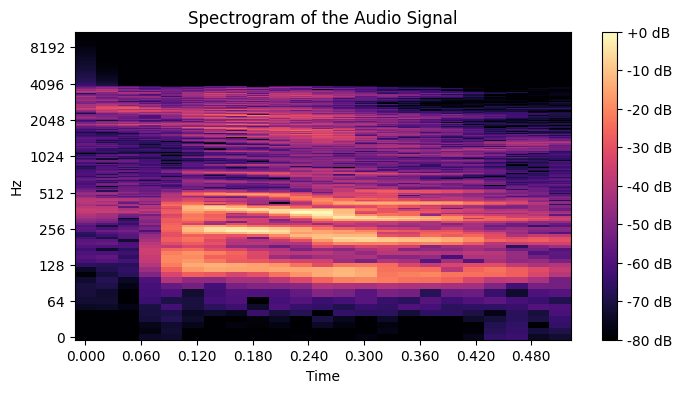

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(8, 4))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio Signal')
plt.show()

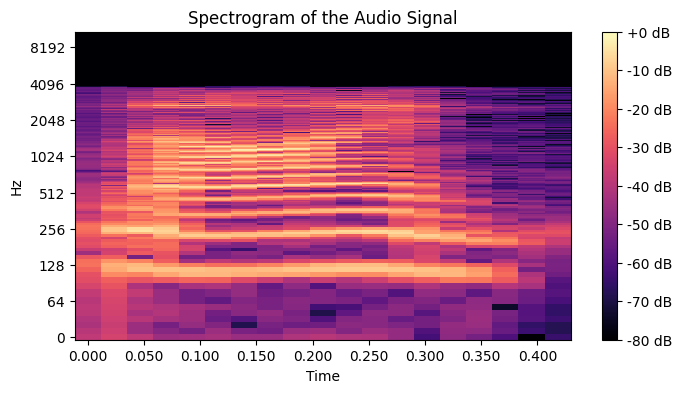

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(8, 4))
librosa.display.specshow(D, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of the Audio Signal')
plt.show()

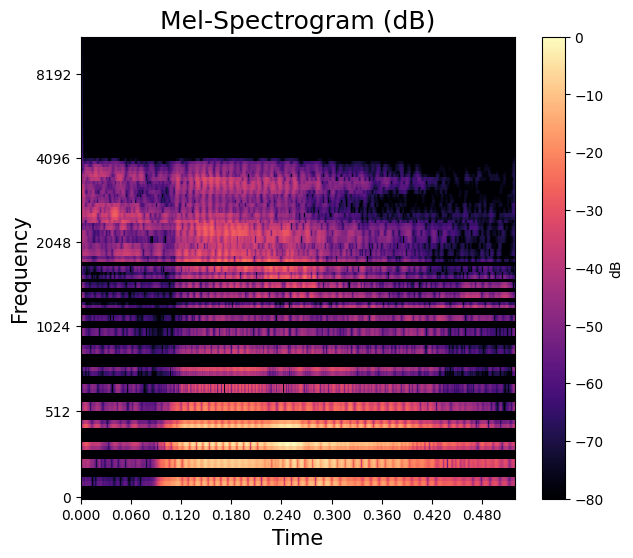

In [ ]:
mel_signal = librosa.feature.melspectrogram(y=y1, sr=sr1, hop_length=2, n_fft=200)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(7, 6))
librosa.display.specshow(power_to_db, sr=sr1, x_axis='time', y_axis='mel', cmap='magma', hop_length=2)

plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

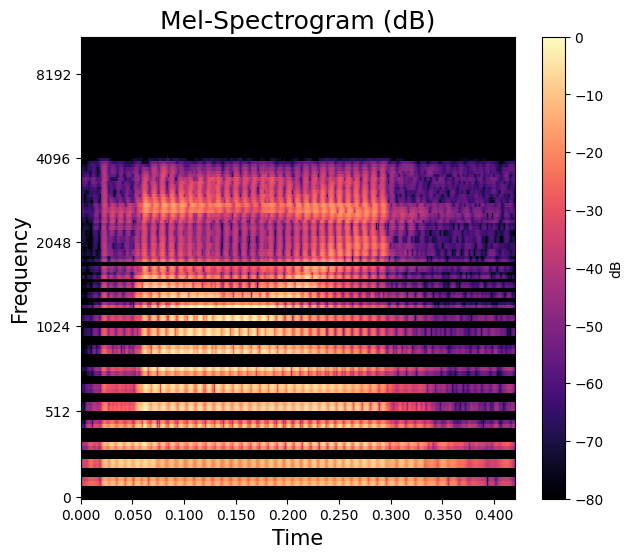

In [ ]:
mel_signal = librosa.feature.melspectrogram(y=y2, sr=sr2, hop_length=2, n_fft=200)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(7, 6))
librosa.display.specshow(power_to_db, sr=sr2, x_axis='time', y_axis='mel', cmap='magma', hop_length=2)

plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()